In [21]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print( train_data[0])
print( max([max(sequence) for sequence in train_data]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
9999


In [36]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

print(x_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [42]:
y_train = np.asarray(train_labels).astype('float32')
print(train_labels)
print(y_train)

[1 0 0 ... 0 1 0]
[1. 0. 0. ... 0. 1. 0.]


In [43]:
y_test = np.asarray(test_labels).astype('float32')
print(test_labels)
print(y_test)

[0 1 1 ... 0 0 0]
[0. 1. 1. ... 0. 0. 0.]


In [45]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [47]:
from keras import optimizers

model.compile(optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [49]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [67]:
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['acc'])


history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.1545 - acc: 0.9461 - val_loss: 0.1698 - val_acc: 0.9376
Epoch 2/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1201 - acc: 0.9612 - val_loss: 0.1605 - val_acc: 0.9415
Epoch 3/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1003 - acc: 0.9696 - val_loss: 0.1841 - val_acc: 0.9300
Epoch 4/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.0842 - acc: 0.9753 - val_loss: 0.1895 - val_acc: 0.9291
Epoch 5/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.0707 - acc: 0.9815 - val_loss: 0.2125 - val_acc: 0.9230
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.0590 - acc: 0.9853 - val_loss: 0.2297 - val_acc: 0.9186
Epoch 7/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.0484 - acc: 0.9888 - val_loss: 0.2493 - val_ac

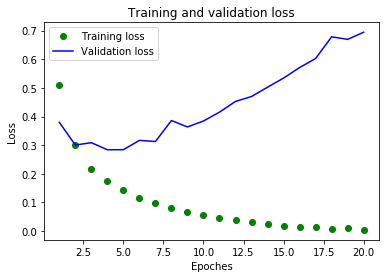

In [56]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()

plt.show()

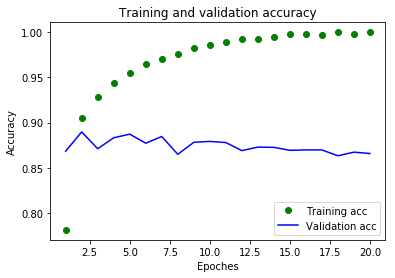

In [60]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [68]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.4954 - acc: 0.7964
Epoch 2/4
25000/25000 [==============================] - 1s 59us/step - loss: 0.2798 - acc: 0.9052
Epoch 3/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.2061 - acc: 0.9290
Epoch 4/4
25000/25000 [==============================] - 1s 56us/step


In [69]:
print(model.predict(x_test))

[[0.2441687 ]
 [0.9999895 ]
 [0.969327  ]
 ...
 [0.14372253]
 [0.072446  ]
 [0.7378783 ]]
